In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/sample_data/bank.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,['age',
                               'day','duration','campaign','previous'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3945,84,retired,married,tertiary,no,4761,no,no,telephone,9,sep,1405,1,92,3,failure,yes


In [ ]:
data = data.drop([3945], axis=0)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<ipython-input-12-ed779aeb2345>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)


<Axes: >

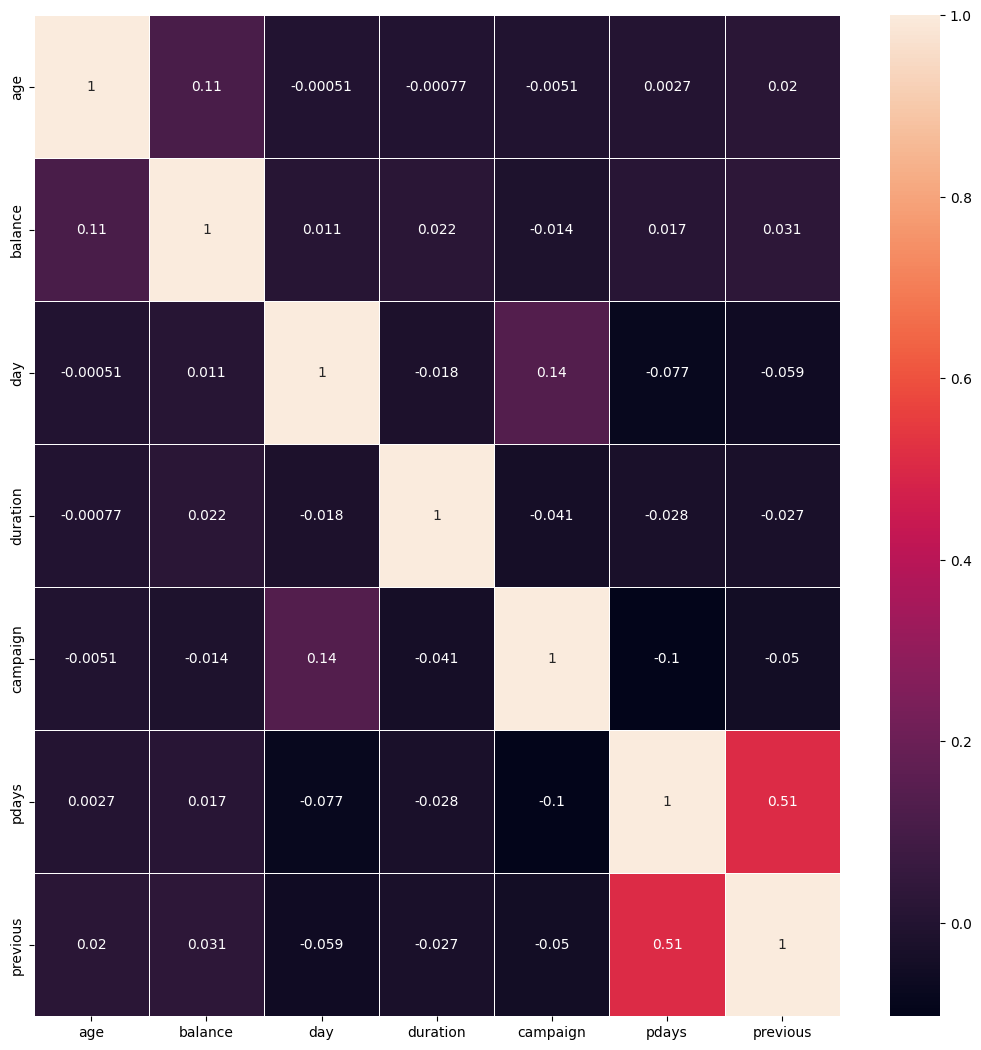

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
data=data.drop(['duration'],axis=1)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [ ]:
data.shape

(11161, 16)

In [ ]:
columns=data.select_dtypes(include=[object]).columns
data=pd.concat([data,pd.get_dummies(data[columns])],axis=1)
data=data.drop(['job','marital','education','default','housing','loan','contact','month','day','poutcome'],axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 0 to 11161
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  11161 non-null  int64 
 1   balance              11161 non-null  int64 
 2   campaign             11161 non-null  int64 
 3   pdays                11161 non-null  int64 
 4   previous             11161 non-null  int64 
 5   deposit              11161 non-null  object
 6   job_admin.           11161 non-null  uint8 
 7   job_blue-collar      11161 non-null  uint8 
 8   job_entrepreneur     11161 non-null  uint8 
 9   job_housemaid        11161 non-null  uint8 
 10  job_management       11161 non-null  uint8 
 11  job_retired          11161 non-null  uint8 
 12  job_self-employed    11161 non-null  uint8 
 13  job_services         11161 non-null  uint8 
 14  job_student          11161 non-null  uint8 
 15  job_technician       11161 non-null  uint8 
 16  job_

,age,balance,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [ ]:
def pdayswork(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)
data['pdays2'] = data['pdays'].apply(pdayswork)

In [ ]:
data.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'deposit',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'deposit_no', 'deposit_yes', 'pdays2'],
      dtype='object')

In [ ]:
data=data.drop(['deposit_no', 'deposit_yes'],axis=1)

In [ ]:
def deposit1(deposit):
    if(deposit=='yes'):
        return(1)
    elif(deposit=='no'):
        return(0)
data['depositNew'] = data['deposit'].apply(deposit1)

In [ ]:
data=data.drop(['deposit'],axis=1)

In [ ]:
data.shape

(11161, 51)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(X)

[[ 1.4926218   0.25261499 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [ 1.24065834 -0.4598839  -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [-0.01915895 -0.08007052 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 ...
 [-0.77504932 -0.46484473 -0.18682923 ... -0.32579855  0.58352347
  -0.58379938]
 [ 0.14881669 -0.47383623 -0.18682923 ... -0.32579855 -1.71372713
   1.71291719]
 [-0.60707368 -0.47383623 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

accuracies = {}
f1scores={}

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101,multi_class='ovr',solver='liblinear',class_weight='balanced',C=0.2)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

In [ ]:
prediction

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,prediction))
acc = accuracy_score(y_test,prediction)*100
print("Logistic Regression accuracy:",acc)
accuracies['Logistic Regression']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Logistic Regression']=f1
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
cm1

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1176
           1       0.71      0.64      0.67      1057

    accuracy                           0.71      2233
   macro avg       0.71      0.70      0.70      2233
weighted avg       0.71      0.71      0.71      2233

Logistic Regression accuracy: 70.71204657411553
F1-Score:  67.36526946107784


array([[904, 272],
       [382, 675]])

In [ ]:
from pandas.core.base import value_counts
value_counts(prediction)


0    1286
1     947
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
predictions=dtree.predict(X_test)

In [ ]:
predictions

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
value_counts(predictions)

0    1530
1     703
dtype: int64

In [ ]:
print(classification_report(y_test,predictions))
acc = accuracy_score(y_test,predictions)*100
print("Decision Tree accuracy:",acc)
accuracies['Decision Tree']=acc

f1=f1_score(y_test,predictions)*100
print("F1-Score: ",f1)
f1scores['Decision Tree']=f1
cm2=confusion_matrix(y_test,predictions)
cm2

              precision    recall  f1-score   support

           0       0.67      0.87      0.76      1176
           1       0.78      0.52      0.63      1057

    accuracy                           0.71      2233
   macro avg       0.73      0.70      0.69      2233
weighted avg       0.72      0.71      0.69      2233

Decision Tree accuracy: 70.53291536050156
F1-Score:  62.61363636363636


array([[1024,  152],
       [ 506,  551]])

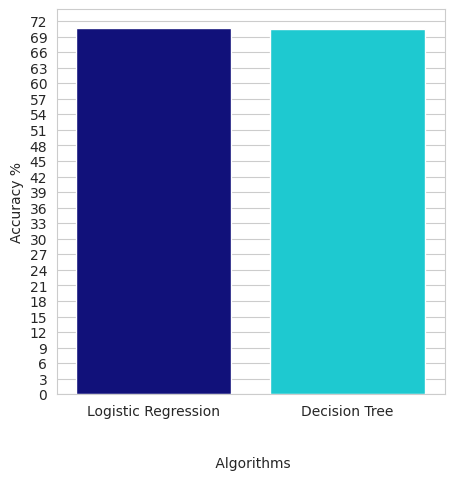

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.yticks(np.arange(0,100,3))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()